In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr

In [2]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [3]:
def formatstring(myfloat):
    return '%.5f'%myfloat

In [41]:
mpList = list(np.arange(6.7,8.4+0.1,0.1))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)

In [42]:
#fList = list(np.logspace(-4,np.log10(2*(10**-2)),12))
fList = [0.001, 0.002, 0.003] + list(np.arange(0.004, 0.034+0.002, 0.002))
for i, f in enumerate(fList):
    fList[i] = formatstring(f)

In [44]:
entropyList = [7.27,7.27,7.28,7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,7.32,7.32,7.32,7.33,7.33,7.34]
for i, ent in enumerate(entropyList):
    entropyList[i] = formatstring(ent)

In [45]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

def deltaf(history):
    initf = history.envelope_mass[0] / (history.star_mass[0] * msun)
    finf = history.envelope_mass[-1] / (history.star_mass[-1] * msun)
    return finf - initf 

def deltam(history):
    initm = history.star_mass[0] * mfrac
    finm = history.star_mass[-1] * mfrac
    return finm - initm

In [46]:
masses = []
radii = [] 
fs = []
deltams = []
deltafs = []
ages = []

for i, m in enumerate(mpList):
    ent = entropyList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/146c_fine/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses.append(h.star_mass*mfrac)
        radii.append(h.radius*rfrac)
        fs.append(envelope_fraction(h))
        
        deltams.append(deltam(h))
        deltafs.append(deltaf(h))
        ages.append(h.star_age)

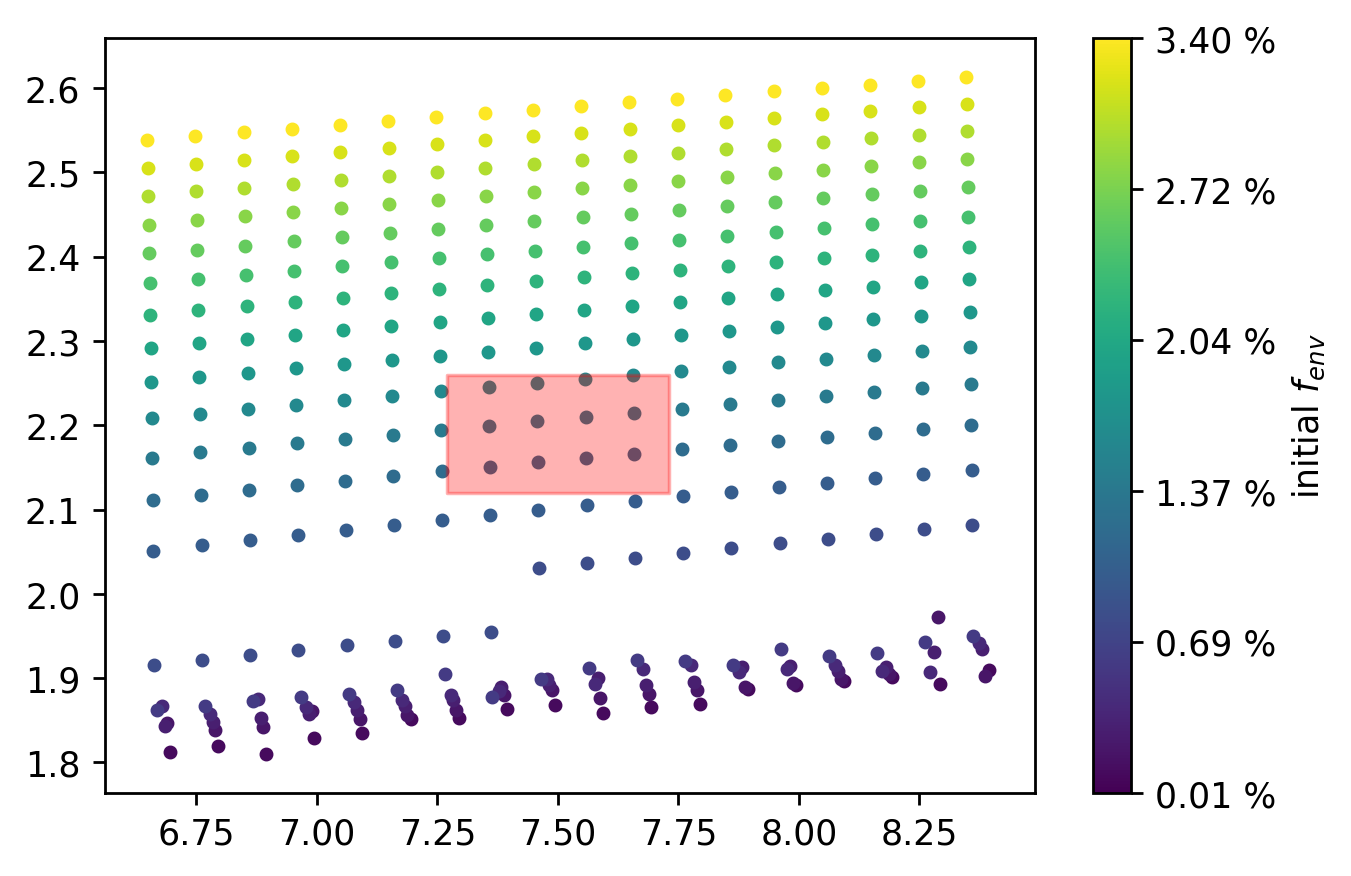

In [47]:
cmap = plt.get_cmap('viridis')

absmin = 1.0e-4 #np.min(np.hstack(fs))
absmax = np.max(np.hstack(fs))

for i in range(0,len(fs)):
    thiscolor = (fs[i][0] - absmin)/(absmax - absmin)
    thiscolor = np.max(thiscolor,0)
    plt.scatter(masses[i][-1],radii[i][-1],marker='.',color=cmap(thiscolor))

plt.gcf().set_dpi(250)

cbar = plt.colorbar()
ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
labels = ticks * (absmax-absmin) + absmin
labels = ['%.2f %%'%(label * 100) for label in labels]
cbar.set_ticklabels(labels)
cbar.set_label('initial $f_{env}$')

meas_m = 7.50
delta_meas_m = 0.23
meas_r = 2.19
delta_meas_r = 0.07
plt.gca().fill_between([meas_m - delta_meas_m, meas_m + delta_meas_m],meas_r - delta_meas_r,meas_r + delta_meas_r,
                  color='red',alpha=0.3)

In [48]:
np.savez('146c_data.npz',masses=masses,radii=radii,fs=fs,ages=ages)